# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [2]:
import pandas as pd
pd.options.display.max_colwidth = 500

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [92]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx",
              nrows=30000,
              na_values=[0, 'Unknown','UNKNOWN', 'unknown','NS'])

df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [30]:
df.shape

(30000, 15)

In [31]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [32]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


Each row is a applied and issued dog license in New York City.  
Animal Gender: the gender of the dog.  
Vaccinated: whether the licensed dog is vaccinated or not.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. What are the most popular dog names in NYC  
1. How many dogs in NYC have been vaccinated (percentage)  
1. The average age of dogs in NYC

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [33]:
top_breeds = df['Primary Breed'].value_counts().head(10)
top_breeds

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

<Axes: xlabel='Primary Breed'>

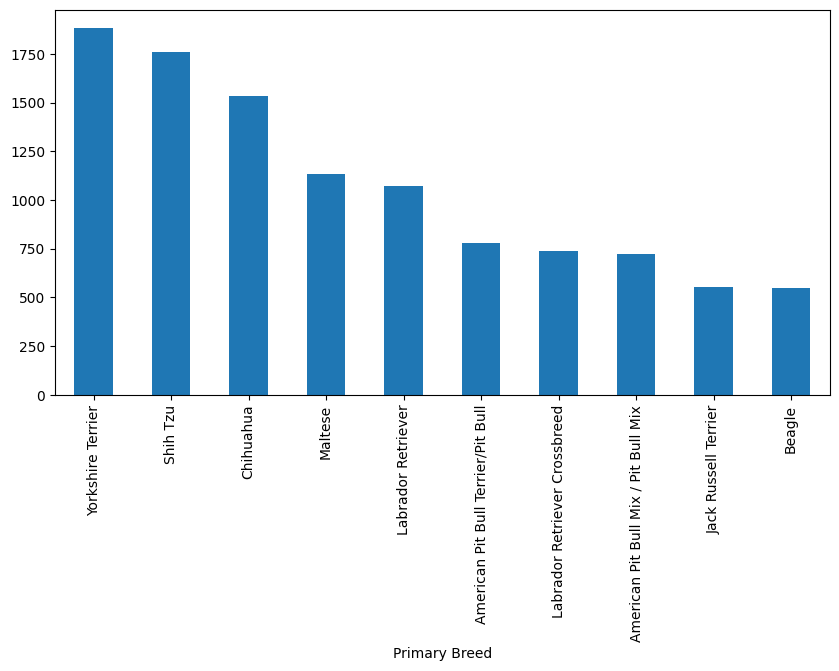

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
top_breeds.plot(kind='bar')


## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<Axes: xlabel='Primary Breed'>

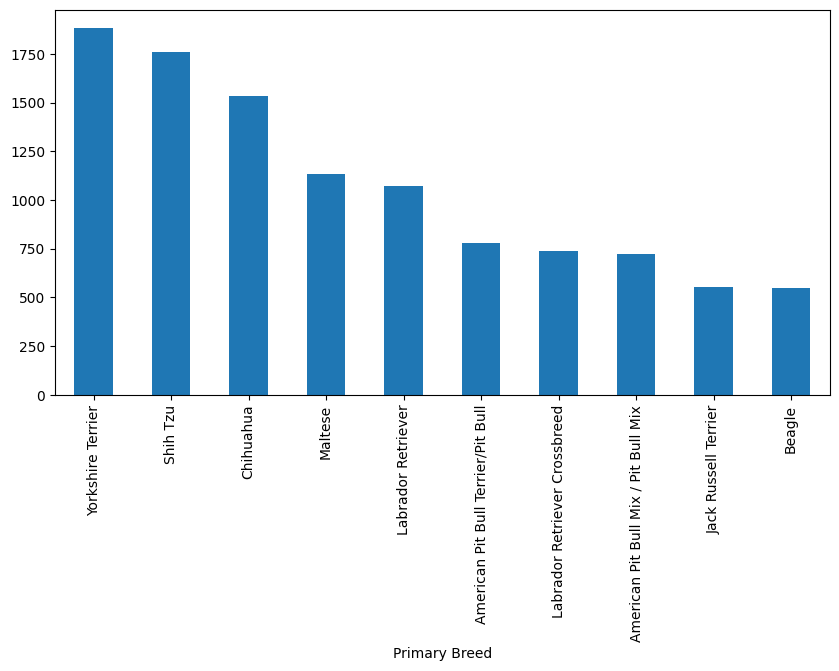

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
top_breeds.plot(kind='bar')

## What are the most popular dog names?

In [36]:
df['Animal Name'].value_counts().head(10)

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [43]:
df[df['Animal Name'] == "Ashley"].shape[0]

8

In [42]:
df[df['Animal Name'] == "Max"].shape[0]

202

In [44]:
df[df['Animal Name'] == "Maxwell"].shape[0]

11

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [47]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

In [52]:
guard_dogs_percentage = round (17 / 300000 * 100, 2)
print(f"{guard_dogs_percentage}% of all licensed dogs are guard dogs.")

0.01% of all licensed dogs are guard dogs.


## What are the actual numbers?

Guard or Trained  
No     19809  
NaN    10174  
Yes       17


## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

but it is the same as the number of rows?
19809 + 10174 + 17 = 30000

## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

In [54]:
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')

In [55]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [69]:
df[df['Guard or Trained'] == "Yes"].groupby('Primary Breed').size().sort_values(ascending=False)

Primary Breed
German Shepherd Dog           3
Doberman Pinscher             1
German Shepherd Crossbreed    1
Golden Retriever              1
Labrador Retriever            1
Poodle, Standard              1
Rottweiler                    1
Schnauzer, Miniature          1
Shih Tzu                      1
Yorkshire Terrier             1
dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [71]:
df['year'] = df['Animal Birth'].dt.year

df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [74]:
df['age'] = 2024 - df['year']

df['age'].mean()

np.float64(14.712433333333333)

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [122]:
neighborhoods_df = pd.read_csv('zipcodes-neighborhoods.csv', na_values=['unknown'])

merged = df.merge(neighborhoods_df, left_on='Owner Zip Code', right_on='zip')
merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,Upper West Side,10024,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,Southeast Bronx,10461,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,Greenwich Village and Soho,10013,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,Upper West Side,10025,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,Greenwich Village and Soho,10013,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [123]:
merged[merged['borough'] == "Bronx"].value_counts('Animal Name').head()

Animal Name
Bella       22
Max         21
Rocky       20
Lucky       15
Princess    15
Name: count, dtype: int64

In [98]:
merged[merged['borough'] == "Brooklyn"].value_counts('Animal Name').head()

Animal Name
Max        46
Bella      45
Charlie    42
Rocky      36
Lucy       32
Name: count, dtype: int64

In [99]:
merged[merged['neighborhood'] == "Upper West Side"].value_counts('Animal Name').head()

Animal Name
Lola       17
Lucy       16
Charlie    12
Cooper     11
Lily       11
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [110]:
neighborhood_breed_counts = merged.groupby(['neighborhood', 'Primary Breed']).size()
neighborhood_breed_counts = neighborhood_breed_counts.reset_index(name='count')
most_common_breeds = neighborhood_breed_counts.loc[neighborhood_breed_counts.groupby('neighborhood')['count'].idxmax()]
print(most_common_breeds[['neighborhood', 'Primary Breed', 'count']])


                       neighborhood                         Primary Breed  \
97                     Borough Park                     Yorkshire Terrier   
158          Bronx Park and Fordham                     Yorkshire Terrier   
259       Bushwick and Williamsburg                     Yorkshire Terrier   
340          Canarsie and Flatlands                              Shih Tzu   
403                   Central Bronx                     Yorkshire Terrier   
505                Central Brooklyn                              Shih Tzu   
549                  Central Harlem                             Chihuahua   
675                  Central Queens                     Yorkshire Terrier   
713             Chelsea and Clinton                             Chihuahua   
897                     East Harlem                     Yorkshire Terrier   
968      East New York and New Lots                     Yorkshire Terrier   
1043                       Flatbush                              Shih Tzu   

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

In [112]:
merged['Animal Dominant Color'] = merged['Animal Dominant Color'].str.lower()
merged['Animal Secondary Color'] = merged['Animal Secondary Color'].str.lower()
merged['Animal Third Color'] = merged['Animal Third Color'].str.lower()

monochrome_colors = ['black', 'white', 'grey']

merged['monochrome'] = merged[['Animal Dominant Color', 'Animal Secondary Color', 'Animal Third Color']].isin(monochrome_colors).all(axis=1)

monochrome_count = merged['monochrome'].sum()

print(f"Number of monochrome animals: {monochrome_count}")

Number of monochrome animals: 69


## How many dogs are in each borough? Plot it in a graph.

Text(0, 0.5, 'Number of Dogs')

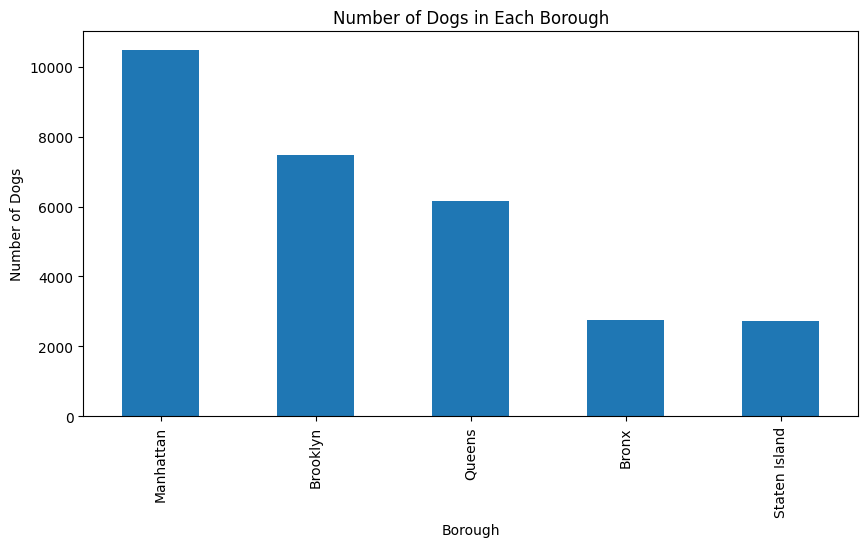

In [118]:
import matplotlib.pyplot as plt

borough_dog_count = merged['borough'].value_counts()

plt.figure(figsize=(10, 5))
borough_dog_count.plot(kind='bar')

plt.title('Number of Dogs in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Dogs')


## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [125]:
pop_df = pd.read_csv('boro_population.csv')

merged2 = merged.merge(pop_df, left_on='borough', right_on='borough')
merged2.shape

(29573, 20)

In [130]:
merged2[['borough', 'population']].drop_duplicates()

,borough,population
0,Manhattan,1644518
1,Bronx,1455444
11,Brooklyn,2636735
17,Staten Island,474558
35,Queens,2339150


In [131]:
borough_dog_count = merged2['borough'].value_counts()
borough_dog_count

borough
Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: count, dtype: int64

In [136]:
manhattan_dogs = 10478 / 1644518
brooklyn_dogs = 7466 / 2636735
queens_dogs = 6154 / 2339150
bronx_dogs = 2748 / 1455444
staten_island = 2727 / 474558

print(f"Manhattan dogs per capita: {manhattan_dogs:.6f}")
print(f"Brooklyn dogs per capita: {brooklyn_dogs:.6f}")
print(f"Queens dogs per capita: {queens_dogs:.6f}")
print(f"Bronx dogs per capita: {bronx_dogs:.6f}")
print(f"Staten Island dogs per capita: {staten_island:.6f}")


Manhattan dogs per capita: 0.006371
Brooklyn dogs per capita: 0.002832
Queens dogs per capita: 0.002631
Bronx dogs per capita: 0.001888
Staten Island dogs per capita: 0.005746


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

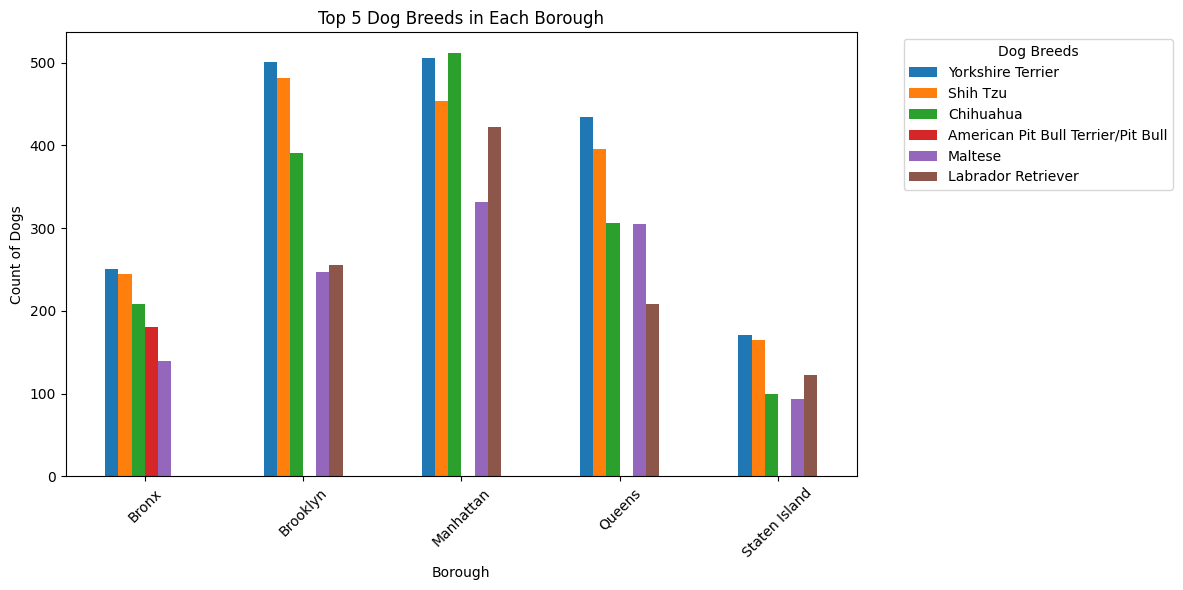

In [137]:
import matplotlib.pyplot as plt

breed_counts = merged.groupby(['borough', 'Primary Breed']).size()

top_5_breeds_per_borough = breed_counts.groupby('borough', group_keys=False).apply(lambda x: x.nlargest(5))

top_5_breeds_per_borough.unstack().plot(kind='bar', stacked=False, figsize=(12, 6))

plt.title('Top 5 Dog Breeds in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Count of Dogs')
plt.xticks(rotation=45)
plt.legend(title="Dog Breeds", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()